# Homework 1 - ML for PP
Felipe Alamos

In [ ]:
import requests
import pandas as pd

                                       2017      2018  % change
Type of Crimes                                                 
ARSON                                 444.0     372.0     -16.0
ASSAULT                             19303.0   20377.0       6.0
BATTERY                             49214.0   49782.0       1.0
BURGLARY                            13001.0   11730.0     -10.0
CONCEALED CARRY LICENSE VIOLATION      69.0     149.0     116.0
CRIM SEXUAL ASSAULT                  1628.0    1627.0      -0.0
CRIMINAL DAMAGE                     29042.0   27806.0      -4.0
CRIMINAL TRESPASS                    6812.0    6904.0       1.0
DECEPTIVE PRACTICE                  19028.0   18731.0      -2.0
GAMBLING                              191.0     201.0       5.0
HOMICIDE                              676.0     586.0     -13.0
HUMAN TRAFFICKING                       9.0      14.0      56.0
INTERFERENCE WITH PUBLIC OFFICER     1086.0    1305.0      20.0
INTIMIDATION                          15

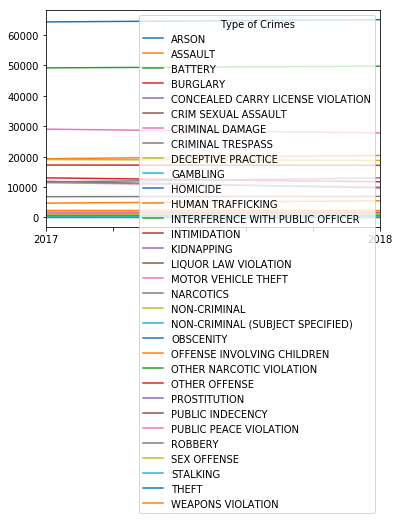

In [137]:
crime_2018_url = "https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2018&$limit=300000"#300000"
crime_2017_url = "https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2017&$limit=300000"#300000"
comunities_url ="https://data.cityofchicago.org/resource/igwz-8jzy.json"

def load_comunities():
  return  pd.read_json(comunities_url)

def download_crime_data(year):
  url=''
  if year==2018:
    url=crime_2018_url
  elif year ==2017:
    url=crime_2017_url
  else:
    return False
  return  pd.read_json(url)
  

df_2018 = download_crime_data(2018)
df_2017 = download_crime_data(2017)

# Generate summary statistics for the crime reports data including but not limited to
# number of crimes of each type, how they change over time, and how they are
# different by neighborhood. Please use a combination of tables and graphs to
# present these summary stats.


#Get frquency of different type of crimes
type_crimes_2018 = pd.DataFrame(df_2018.groupby(['primary_type']).size())
type_crimes_2018.columns = ['2018']

type_crimes_2017 = pd.DataFrame(df_2017.groupby(['primary_type']).size())
type_crimes_2017.columns = ['2017']

#Add two dataframes fill NaN with 0s
freq_table = type_crimes_2018.add(type_crimes_2017, fill_value=0)
freq_table=freq_table.fillna(0)
freq_table.index.names = ['Type of Crimes']


#Add totals
n_of_crimes_2018=df_2018.count()[0]
n_of_crimes_2017=df_2017.count()[0]
freq_table.loc['TOTAL', '2017'] = n_of_crimes_2017
freq_table.loc['TOTAL', '2018'] = n_of_crimes_2018


#Add rate change
freq_table['% change'] = round(freq_table['2018']/freq_table['2017']*100-100)

print(freq_table)

#Creat table for plotting, and plot
freq_table_plot = freq_table[['2017','2018']]
freq_table_plot=freq_table_plot.drop(freq_table_plot.tail(1).index)
print(freq_table_plot)
freq_table_plot.T.plot.line()

In [122]:
#Analysis per neighborhood/community area
crime_per_neighborhood_2018 = pd.DataFrame(df_2018.groupby(['community_area']).size())
crime_per_neighborhood_2018.columns = ['# of crimes']

neighborhoods = load_comunities()
neighborhoods.index.name = 'id'

#Join between freq table per neigh and table of names of neigh
neighborhoods_table = crime_per_neighborhood_2018.join(neighborhoods, on='community_area')
neighborhoods_table = neighborhoods_table[['# of crimes','community']] #Keep only these 2 columns
neighborhoods_table.columns=['# of crimes','Neighborhood'] #Change columns names

neighborhoods_table['% of total crimes in city'] = neighborhoods_table['# of crimes']/n_of_crimes_2018*100


print(neighborhoods_table.sort_values('# of crimes',ascending=False))

#IDEAL HERE TO INCLUDE HEAT MAP

                # of crimes            Neighborhood  % of total crimes in city
community_area                                                                
28                       10          NEAR WEST SIDE                   9.900990
29                        9          NORTH LAWNDALE                   8.910891
25                        9                  AUSTIN                   8.910891
23                        5           HUMBOLDT PARK                   4.950495
61                        4                CLEARING                   3.960396
21                        4                AVONDALE                   3.960396
71                        4      WASHINGTON HEIGHTS                   3.960396
43                        3           MCKINLEY PARK                   2.970297
26                        3      WEST GARFIELD PARK                   2.970297
63                        2            CHICAGO LAWN                   1.980198
53                        2               HEGEWISCH 